In [17]:
import os
import glob
import json
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_downscale as ART_down
from function import ART_statistic as ART_stat

## Compare Experiments results for GAMMA

### CONTROL: ALL, toll=0.030, bounds (0,25) and (0,0.3)

#### EXP 20: MSWEP, toll=0.005, bounds (0,200) and (0,1)
#### EXP 20: IMERG, toll=0.005, bounds (0,200) and (0,1)

In [18]:
# product, time_reso = 'PERSIANN', '1dy'
# product, time_reso = 'IMERG', '1dy'
# product, time_reso = 'GSMaP', '3h'
# product, time_reso = 'MSWEP', '3h'
product, time_reso = 'ERA5', '3h' # Not ready

In [19]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [20]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [21]:
dir_in = os.path.join(dir_base,'2_GAMMA',f'VENETO_GAMMA_{product}_{time_reso}_2002_2012_npix_5.nc')
DATA = xr.open_dataset(dir_in)
lat = DATA.lat.values
lon = DATA.lon.values
lon2d, lat2d = np.meshgrid(lon,lat)

GAMMA_EXP20 = DATA.GAMMA.values

In [22]:
dir_in = os.path.join(dir_base,'2_GAMMA',f'VENETO_GAMMA_{product}_{time_reso}_2002_2012_npix_5_EXP20.nc')
DATA = xr.open_dataset(dir_in)

GAMMA_CTR20 = DATA.GAMMA.values

FileNotFoundError: [Errno 2] No such file or directory: '/media/arturo/Arturo/Data/Italy/Satellite/2_GAMMA/VENETO_GAMMA_ERA5_3h_2002_2012_npix_5_EXP20.nc'

Text(0.0, 1.0, '(c) EXP - CONTROL')

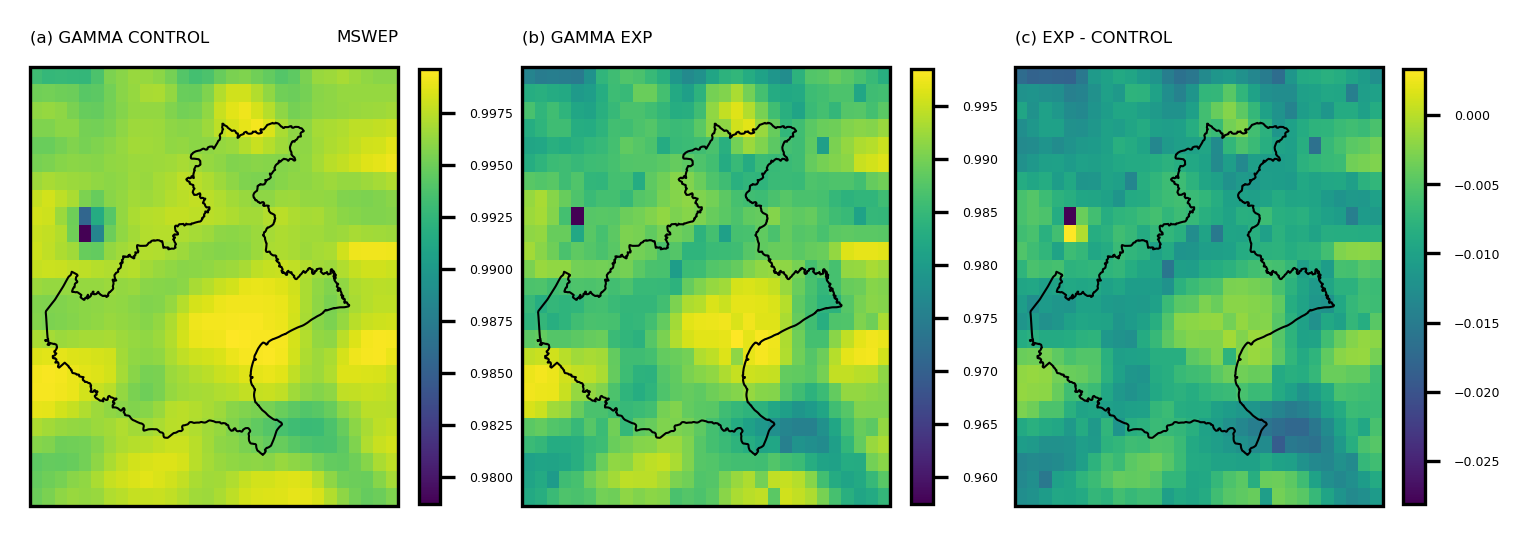

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6,3),dpi=300)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA_CTR20)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(a) GAMMA CONTROL', fontsize=4, loc='left')
ax1.set_title(product, fontsize=4, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA_EXP20)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(b) GAMMA EXP', fontsize=4, loc='left')

ax1 = plt.subplot(gs[0, 2], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA_EXP20 - GAMMA_CTR20)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(c) EXP - CONTROL', fontsize=4, loc='left')

## Compare dowscale results

In [ ]:
dir_in = os.path.join(dir_base,'3_DOWN',f'VENETO_DOWN_{product}_{time_reso}_2002_2012_npix_5.nc')
DATA = xr.open_dataset(dir_in)

N = DATA.N.values
C = DATA.C.values
W = DATA.W.values

In [ ]:
dir_in = os.path.join(dir_base,'1_BETA',f'VENETO_BETA_{product}_{time_reso}_2002_2012_npix_5.nc')
DATA = xr.open_dataset(dir_in)

BETA_CTR = DATA.BETA.values

In [ ]:
NdC, CdC, WdC = ART_down.down_year_parameters(N, C, W, BETA_CTR, GAMMA_CTR20)
Nd10, Cd10, Wd10 = ART_down.down_year_parameters(N, C, W, BETA_CTR, GAMMA_EXP20)

Text(0.0, 1.0, '(d) Shape EXP')

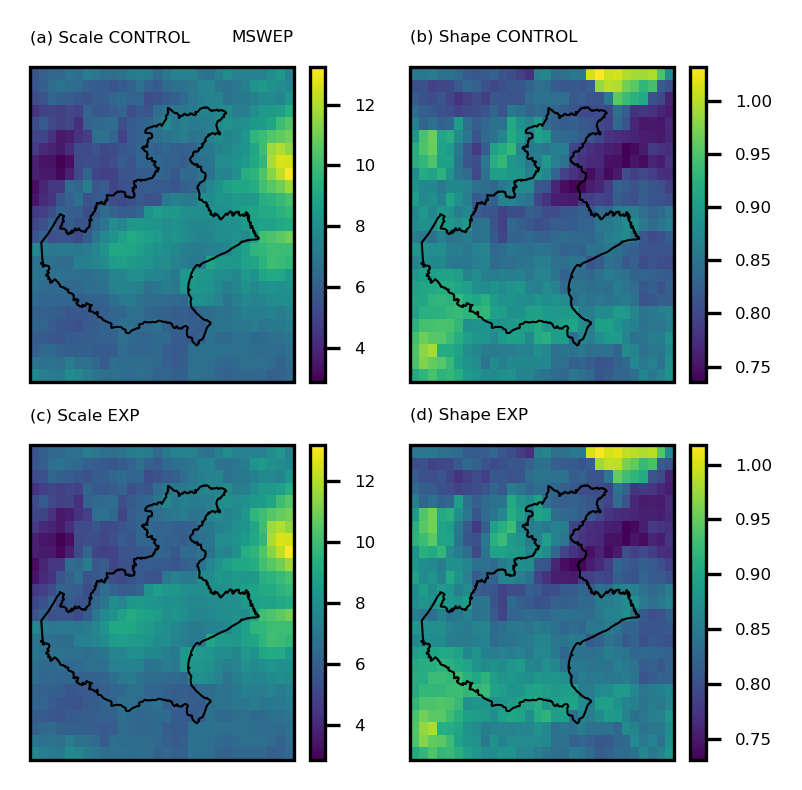

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(3,3),dpi=300)
gs = gridspec.GridSpec(2,2)

# ======================================================================
ax1 = plt.subplot(gs[0, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(CdC,axis=0))
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) Scale CONTROL', fontsize=4, loc='left')
ax1.set_title(product, fontsize=4, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(WdC,axis=0))
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) Shape CONTROL', fontsize=4, loc='left')

# ======================================================================
ax1 = plt.subplot(gs[1, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Cd10,axis=0))
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) Scale EXP', fontsize=4, loc='left')

ax1 = plt.subplot(gs[1, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, np.nanmean(Wd10,axis=0))
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) Shape EXP', fontsize=4, loc='left')

In [ ]:
RMSD_C = ART_stat.calculate_rmsd(CdC, Cd10)
RMSD_W = ART_stat.calculate_rmsd(WdC, Wd10)

Text(0.0, 1.0, '(b) W RMSD')

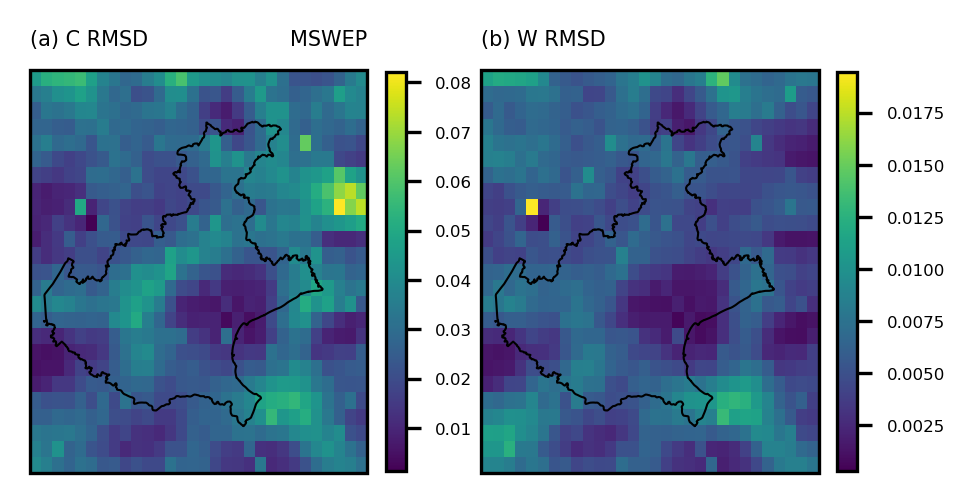

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(5.5,2),dpi=300)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, RMSD_C)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) C RMSD', fontsize=5, loc='left')
ax1.set_title(product, fontsize=5, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, RMSD_W)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) W RMSD', fontsize=5, loc='left')

In [ ]:
Tr = [10, 20, 50, 100, 200]
QUANTILE_C = ART_down.pre_quantiles_array(NdC, CdC, WdC, Tr, lat, lon, 1)
QUANTILE_E = ART_down.pre_quantiles_array(Nd10, Cd10, Wd10, Tr, lat, lon, 1)

In [ ]:
min_50 = np.min([np.nanmin(QUANTILE_C[2,:,:]),np.nanmin(QUANTILE_E[2,:,:])])
max_50 = np.max([np.nanmax(QUANTILE_C[2,:,:]),np.nanmax(QUANTILE_E[2,:,:])])
levels50 = np.arange(min_50-5, max_50+5,5)
norm50 = mcolors.BoundaryNorm(boundaries=levels50, ncolors=256)

min_100 = np.min([np.nanmin(QUANTILE_C[3,:,:]),np.nanmin(QUANTILE_E[3,:,:])])
max_100 = np.max([np.nanmax(QUANTILE_C[3,:,:]),np.nanmax(QUANTILE_E[3,:,:])])
levels100 = np.arange(min_100-5, max_100+5,5)
norm100 = mcolors.BoundaryNorm(boundaries=levels100, ncolors=256)

Text(0.0, 1.0, '(c) EXP - CTRL')

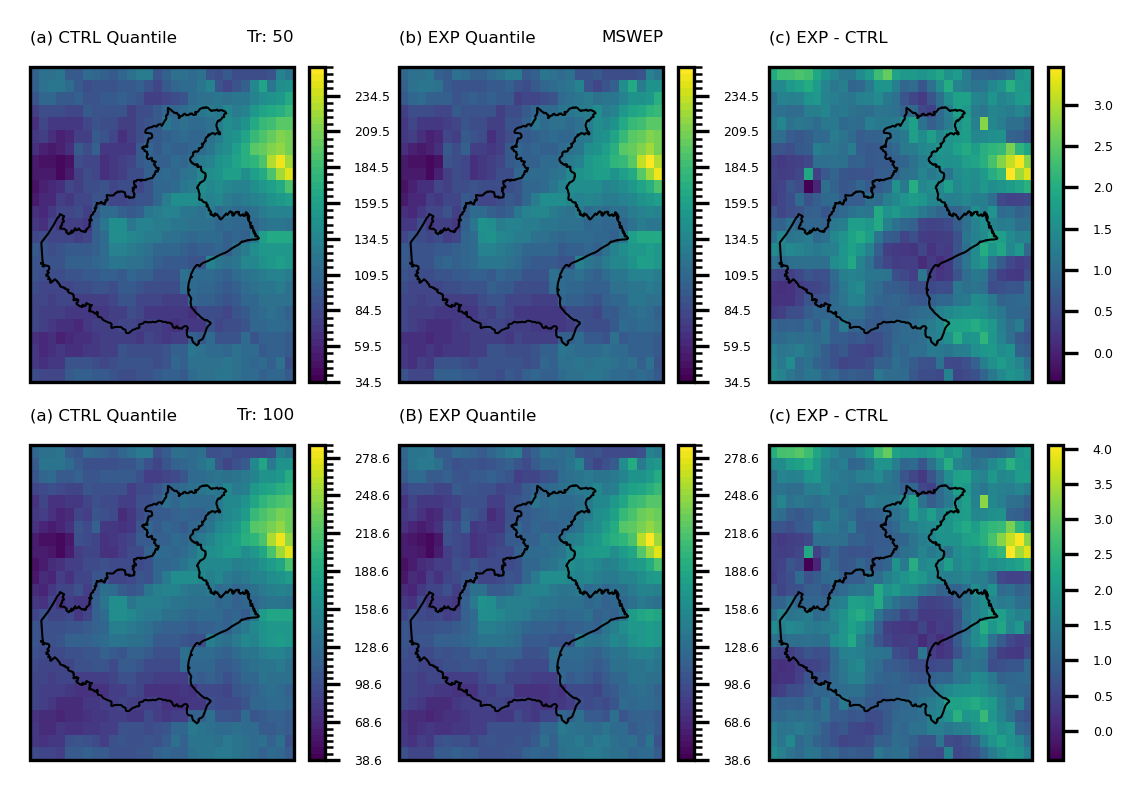

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4.5,3),dpi=300)
gs = gridspec.GridSpec(2,3)

# ======================================================================
ax1 = plt.subplot(gs[0, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_C[2,:,:],norm=norm50)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(a) CTRL Quantile', fontsize=4, loc='left')
ax1.set_title('Tr: 50', fontsize=4, loc='right')

ax1 = plt.subplot(gs[0, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_E[2,:,:],norm=norm50)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(b) EXP Quantile', fontsize=4, loc='left')
ax1.set_title(product, fontsize=4, loc='right')

ax1 = plt.subplot(gs[0, 2], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_E[2,:,:] - QUANTILE_C[2,:,:])
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(c) EXP - CTRL', fontsize=4, loc='left')

# ======================================================================
ax1 = plt.subplot(gs[1, 0], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_C[3,:,:],norm=norm100)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(a) CTRL Quantile', fontsize=4, loc='left')
ax1.set_title('Tr: 100', fontsize=4, loc='right')

ax1 = plt.subplot(gs[1, 1], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_E[3,:,:],norm=norm100)
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(B) EXP Quantile', fontsize=4, loc='left')

ax1 = plt.subplot(gs[1, 2], projection=proj)
VENETO.plot(facecolor='None', ax=ax1, linewidth=0.5, zorder=10)
a1 = ax1.pcolormesh(lon2d, lat2d, QUANTILE_E[3,:,:] - QUANTILE_C[3,:,:])
cbar = plt.colorbar(a1, fraction=0.053)
cbar.ax.tick_params(labelsize=3)
ax1.set_title('(c) EXP - CTRL', fontsize=4, loc='left')
